In [24]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import scipy as sc
import math
from matplotlib import animation

dx = 0.003
dt = 1e-7


x = np.arange(-5,5, dx)

# Harmonic Oscillator

With the time independant Schrödinger equation

$$
-\frac{ħ^2}{2m}\frac{∂^2ψ}{∂x^2} + V(x)ψ = Eψ
$$

we consider a potential of the form
$$
V(x) = \frac{k1}{2}x^2+\frac{k2}{2}x^4
$$


In [25]:
dx = 0.003
dt = 1e-7

x = np.arange(-5,5, dx)

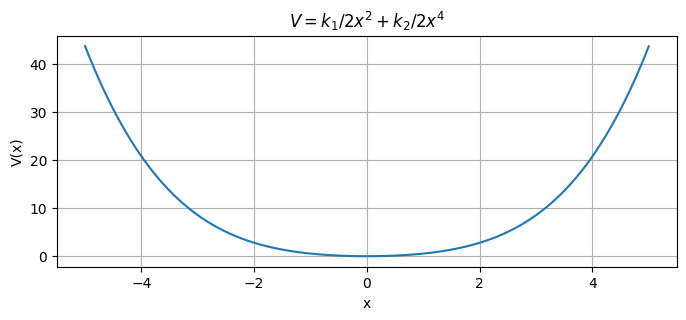

In [26]:
def V(x,k1,k2):
  return k1*x**2/2 + k2*x**4/2

plt.figure(figsize = (8,3))
plt.plot(x,V(x,1,0.1))
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('$V =k_1/2 x^2 +k_2/2 x^4$')
plt.grid()

With the finite differences method (dimentionless: $ħ = 1, x = x/L$)

$$
-\frac{1}{2}\frac{ψ_{j+1}-2ψ_j+ψ_{j-1}}{Δx^2} + V_jψ_j = mEψ_j
$$


We get the followin matrix system

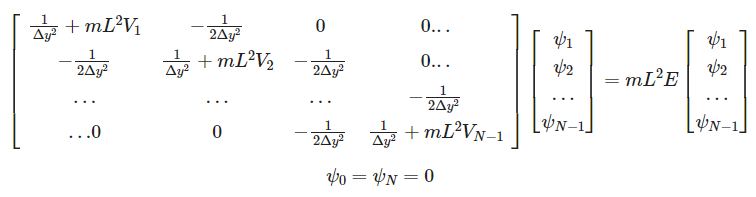

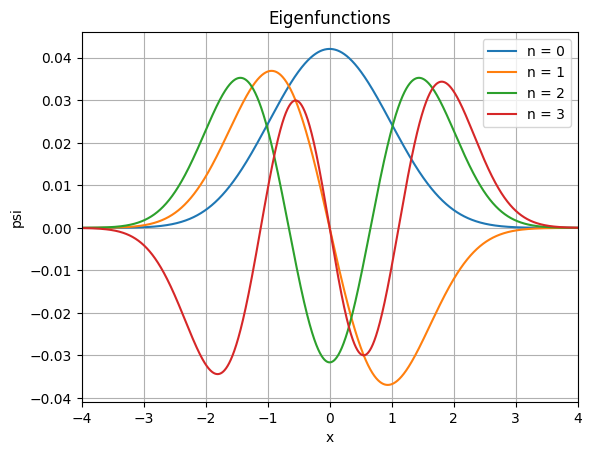

In [27]:
d = 1/dx**2 + V(x,1,0.1)[1:-1]           # main diagonal
d2 = -1/(2*dx**2) * np.ones(len(d)-1)    # secondary diagonals
E, f = eigh_tridiagonal(d, d2)           # eigenvalues (E) and eigenfunctions (f)

X=np.arange(-5+dx,5-dx,dx)
plt.plot(X,f.T[0] , label='n = 0')
plt.plot(X,f.T[1] , label='n = 1')
plt.plot(X,f.T[2] , label='n = 2')
plt.plot(X,f.T[3] , label='n = 3')
plt.title('Eigenfunctions')
plt.xlabel('x')
plt.ylabel('psi')
plt.xlim(-4,4)
plt.grid()
plt.legend()


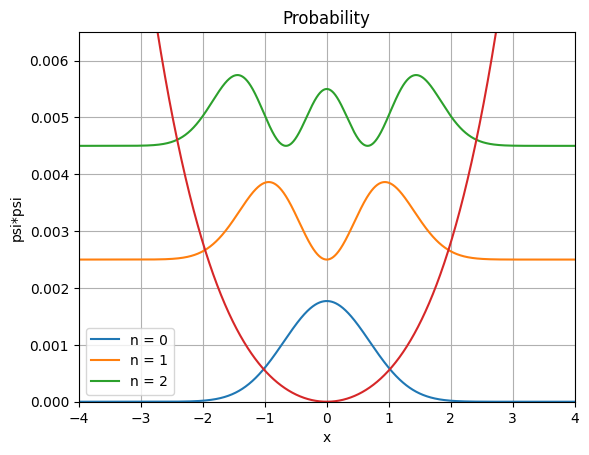

In [28]:
plt.plot(X,f.T[0]**2, label='n = 0')
plt.plot(X,f.T[1]**2 +0.0025, label='n = 1')
plt.plot(X,f.T[2]**2 +0.0045, label='n = 2')
plt.title('Probability')
plt.xlabel('x')
plt.ylabel('psi*psi')
plt.plot(X,V(X,1,0.1)/1000)
plt.xlim(-4,4)
plt.ylim(0,0.0065)
plt.grid()
plt.legend()

With the eigenfunctionss $\phi_i$ ans the eigenvalues $E_j$ we can expand the wave function as follows

$$
ψ(x,t) = \sum_{i=0}^{\infty}a_i\phi_i(x)e^{-E_it}
$$

where
$$
a_i = \int_{-∞}^∞ \phi_i(x)^*ψ(x,0) \;dx
$$

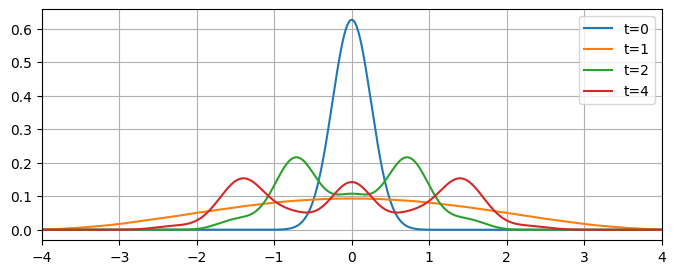

In [29]:
sigma = 0.5
gaussian = np.exp(-x**2/sigma**2)                            # Gaussian packet centered
C = np.sqrt(np.sum(np.absolute(gaussian)**2)*dx)
Psi0 = C*gaussian

E_i = E[0:80]
Phi_i = np.pad(f.T[0:80], [(0, 0), (1, 1)], mode='constant') # boundry conditions
ai = np.dot(Phi_i, Psi0)                                     # internal product
def Psi(t):
    return Phi_i.T@(ai*np.exp(-1j*E_i*t))                    # matrix product

plt.figure(figsize=(8,3))
plt.plot(x, np.absolute(Psi(0))**2, label = 't=0')
plt.plot(x, np.absolute(Psi(1))**2, label = 't=1')
plt.plot(x, np.absolute(Psi(2))**2, label = 't=2')
plt.plot(x, np.absolute(Psi(4))**2, label = 't=4')
plt.legend()
plt.xlim(-4,4)
plt.grid()


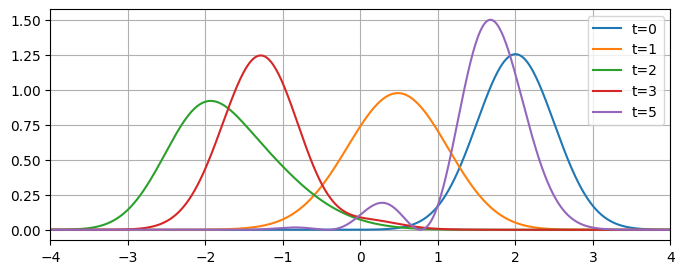

In [30]:
sigma = 1
gaussian2 = np.exp(-(x-2)**2/sigma**2) # Gaussian packet not centered
C2 = np.sqrt(np.sum(np.absolute(gaussian2)**2)*dx)
Psi02 = C2*gaussian2

E_i2 = E[0:80]
Phi_i2 = np.pad(f.T[0:80], [(0, 0), (1, 1)], mode='constant')
ai2 = np.dot(Phi_i2, Psi02)
def Psi2(t):
    return Phi_i2.T@(ai2*np.exp(-1j*E_i2*t))

plt.figure(figsize=(8,3))
plt.plot(x, np.absolute(Psi2(0))**2, label = 't=0')
plt.plot(x, np.absolute(Psi2(1))**2, label = 't=1')
plt.plot(x, np.absolute(Psi2(2))**2, label = 't=2')
plt.plot(x, np.absolute(Psi2(3))**2, label = 't=3')
plt.plot(x, np.absolute(Psi2(5))**2, label = 't=5')
plt.legend()
plt.xlim(-4,4)
plt.grid()

to compare, let us make k2 = 0

$$
V(x) = k_1x^2/2
$$

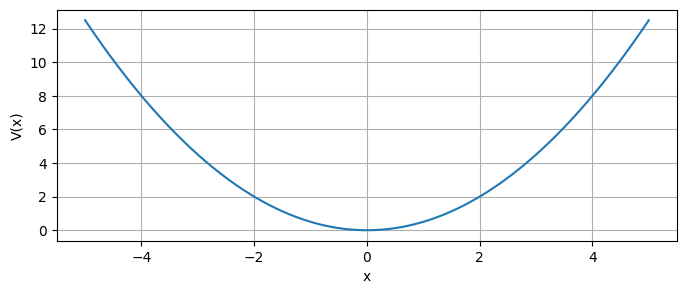

In [31]:
plt.figure(figsize = (8,3))
plt.plot(x,V(x,1,0))
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid()

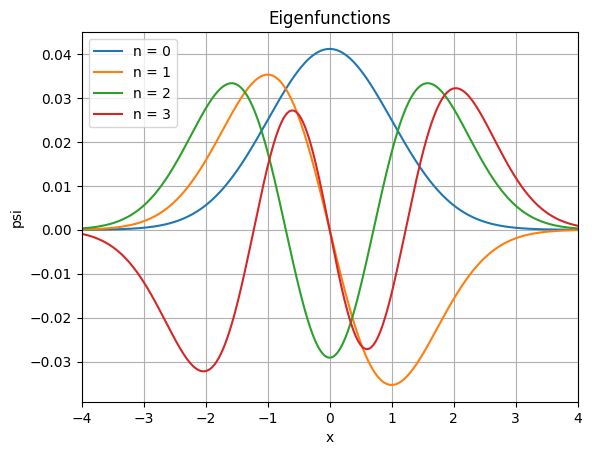

In [32]:
d = 1/dx**2 + V(x,1,0)[1:-1]
d2 = -1/(2*dx**2) * np.ones(len(d)-1)

e, v = eigh_tridiagonal(d, d2)

X=np.arange(-5+dx,5-dx,dx)
plt.plot(X,v.T[0] , label='n = 0')
plt.plot(X,v.T[1] , label='n = 1')
plt.plot(X,v.T[2] , label='n = 2')
plt.plot(X,v.T[3] , label='n = 3')
plt.title('Eigenfunctions')
plt.xlabel('x')
plt.ylabel('psi')
plt.xlim(-4,4)
plt.grid()
plt.legend()

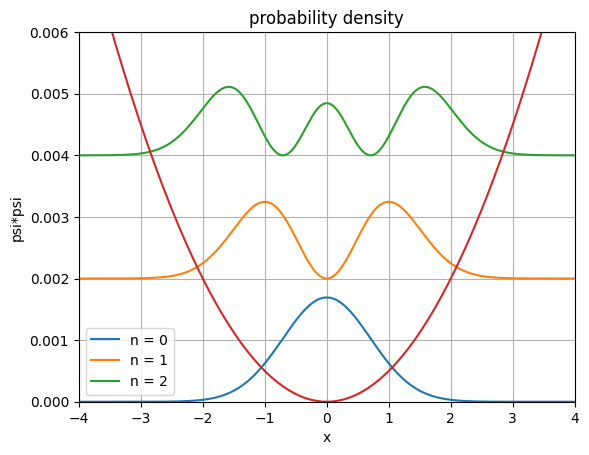

In [33]:
plt.plot(X,v.T[0]**2, label='n = 0')
plt.plot(X,v.T[1]**2 +0.002, label='n = 1')
plt.plot(X,v.T[2]**2 +0.004, label='n = 2')
plt.title('probability density')
plt.xlabel('x')
plt.ylabel('psi*psi')
plt.plot(X,V(X,1,0)/1000)
plt.xlim(-4,4)
plt.ylim(0,0.006)
plt.grid()
plt.legend()

In [34]:
sigma = np.sqrt(2)
gaussian = np.exp(-x**2/sigma**2)
C = np.sqrt(np.sum(np.absolute(gaussian)**2)*dx)
psi0 = C*gaussian

E_i = e[0:80]
phi_i = np.pad(v.T[0:80], [(0, 0), (1, 1)], mode='constant')
ai = np.dot(phi_i, psi0)
def psi(t):
    return phi_i.T@(ai*np.exp(-1j*E_i*t))

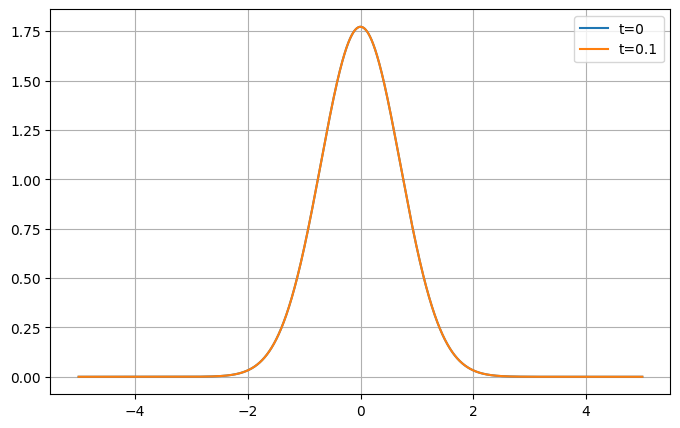

In [45]:
plt.figure(figsize=(8,5))
plt.plot(x, np.absolute(psi(0))**2, label = 't=0')
plt.plot(x, np.absolute(psi(3000))**2, label = 't=0.1')
plt.legend()
plt.grid()

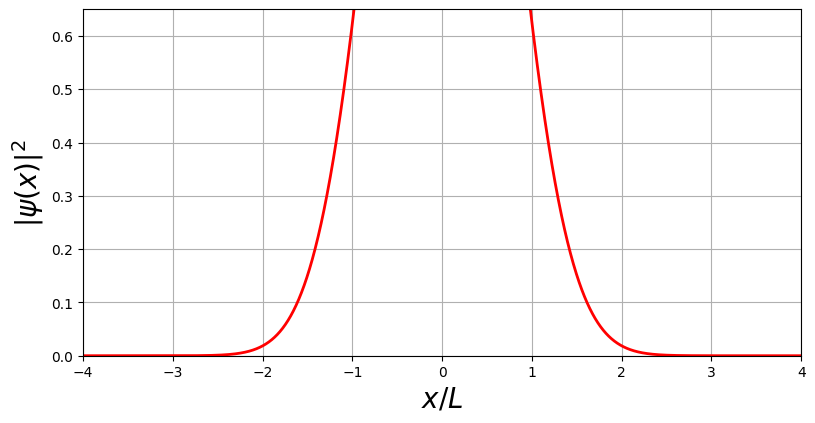

In [36]:
def animate(i):
  ln1.set_data(x, np.absolute(Psi(i*0.05))**2)
  ax.set_ylim(0, 0.65)
  ax.set_xlim(-4,4)
  ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
  ax.set_xlabel('$x/L$', fontsize=20)

  return ln1

fig, ax = plt.subplots(figsize=(8,4))
ax.grid()
ln1, = ax.plot([], [], 'r-', lw=2, markersize=8)
time_text = ax.text(0.65, 16, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=500, interval=1000)
ani.save(filename = 'anharmonic.gif',writer='pillow',fps=50,dpi=100)